Before you turn in your homework, make sure everything runs as expected.

Make sure you complete all the pre-defined functions appropriately by following instructions and execute every single code cell.

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Follow the layout of the pre-defined functions appropriately by completing the missing lines.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Mark Yamakaitis"

# Burgers' equation with TVD Runge-Kutta scheme

---

Let $u \left( x, t \right)$ be the solution of the Burgers' equation in the one-dimensional spatial domain $\Omega = \left[ -2, 2 \right]$:

$$
\frac{\partial u}{\partial t} + \frac{\partial}{\partial x} \left( \frac{u^2}{2} \right) = \nu \frac{\partial^2 u}{\partial x^2} \quad \text{in} \quad \Omega
$$

with constant coefficient of diffusion $\nu = 0.005$ and the following Cauchy distribution as initial condition:

$$
u \left( x, t=0 \right) = \frac{1}{\gamma\pi}[\frac{\gamma^2}{(x-\mu)^2+\gamma^2}]
$$

where $\gamma = 0.3$ and $\mu = -0.4$.

The objective of this assignment is to numerically compute the solution $u \left( x, t \right)$ in the domain $\Omega$ at time $t=2$ (with time-step size $\Delta t = 0.004$) on a grid containing $n_x= 101$ uniformly distributed points.

To advance the solution in time, you will use a TVD (total variation diminishing) third-order Runge-Kutta scheme:

$$
\begin{split}
    &u^{(1)} &= u^n + \Delta t f\left( u^n \right) \\
    &u^{(2)} &= \frac{3}{4} u^n + \frac{1}{4} u^{(1)} + \frac{1}{4} \Delta t f\left( u^{(1)} \right) \\
    &u^{n+1} &= \frac{1}{3} u^n + \frac{2}{3} u^{(2)} + \frac{2}{3} \Delta t f\left( u^{(2)} \right)
\end{split}
$$

where

$$
f \left( u \right) = - \frac{\partial}{\partial x} \left( \frac{u^2}{2} \right) + \nu \frac{\partial^2 u}{\partial x^2}
$$

You will use the finite-difference method to evaluate spatial derivatives:

* approximate first-order derivatives using a first-order backward-difference formula:

$$
\left. \frac{\partial u}{\partial x} \right|_i = \frac{u_i - u_{i-1}}{\Delta x}
$$



* approximate the second-order derivatives using a second-order central-difference formula:

$$
\left. \frac{\partial^2 u}{\partial x^2} \right|_i = \frac{u_{i-1} - 2 u_i + u_{i+1}}{\Delta x^2}
$$

Finally, you will use Dirichlet boundary conditions at both ends of the domain $\Omega$:

$$
\begin{cases}
    u \left( x = -2, t \right) &=& u \left( x = -2, t_0 \right) \quad \forall t \\
    u \left( x = 2, t \right) &=& u \left (x = 2, t_0 \right) \;\;\; \quad \forall t \\
\end{cases}
$$

Let's go!

**IMPORTANT:** Some functions are already pre-defined and you will have to complete them. Please, do not change the name and signature (number of inputs and their order) and do **NOT** erase any print statements.

### Import your libraries in the cell below.

In [2]:
### BEGIN SOLUTION
import numpy
np = numpy
import matplotlib.pyplot as pyp
### END SOLUTION

### Step 1: Spatial grid (5 points)

Create a uniform one-dimensional grid with $n_x = 101$ points in the domain $\Omega = \left[ -2, 2 \right]$.
Store your grid points in a 1D NumPy array floats, called **`x`**.

In [6]:
### BEGIN SOLUTION
nx = 101
x = np.linspace(-2, 2, nx)
dx = x[1] - x[0]

### END SOLUTION

### Step 2: Initial solution (5 points)

Initial Cauchy distribution:

$$
u \left( x, t=0 \right) = \frac{1}{\gamma\pi}[\frac{\gamma^2}{(x-\mu)^2+\gamma^2}]
$$

where $\gamma = 0.3$ and $\mu = -0.4$.

Create a 1D NumPy array of floats, called **`u0`**, that stores the initial solution in the domain $\Omega$.

In [7]:
### BEGIN SOLUTION
PI = np.pi
GAMMA = 0.3
MU = -0.4

u0 =  1/(GAMMA*PI) * (GAMMA**2)
u0 /= ((x - MU)**2 + GAMMA**2)
### END SOLUTION

### Step 3: Convection and Laplacian (20 points)

Complete the two functions, called **`convection`** and **`laplacian`**, to compute the convection term and Laplacian, respectively.

The **`convection`** function should return the value of $\frac{\partial}{\partial x} \left( \frac{u^2}{2} \right)$ **at interior points**.

The **`laplacian`** function should return the value of $\frac{\partial^2 u}{\partial x^2}$ **at interior points**.

Approximate first-order derivatives with a backward-difference formula and second-order derivatives with a central-difference formula.

In [8]:
def convection(u, dx):
    """Compute the convection term.

    Parameters
    ----------
    u : numpy.ndarray
        Solution in the domain (1D array of floats).
    dx : float
        Grid-spacing size.

    Returns
    -------
    numpy.ndarray
        The convection term at interior points (1D array of floats).

    """
    ### BEGIN SOLUTION
    u2 = u*u / 2
    
    du2_dx = (u2[2:] - u2[:-2]) / (2*dx)
    
    return du2_dx
    
    ### END SOLUTION


def laplacian(u, dx):
    """Compute the Laplacian.

    Parameters
    ----------
    u : numpy.ndarray
        Solution in the domain (1D array of floats).
    dx : float
        Grid-spacing size.

    Returns
    -------
    numpy.ndarray
        Laplacian of solution at interior points (1D array of floats).

    """
    ### BEGIN SOLUTION
    
    d2u_dx2 = (u[2:] - 2*u[1:-1] + u[:-2]) / (dx)**2
    
    return d2u_dx2

    ### END SOLUTION
    

### Print (Do not erase)

print(numpy.max(convection(u0, dx)))
print(numpy.max(laplacian(u0, dx)))

1.868057048753236
5.787228678499092


### Step 4: Right-hand side of PDE (15 points)

$$
f \left( u \right) = - \frac{\partial}{\partial x} \left( \frac{u^2}{2} \right) + \nu \frac{\partial^2 u}{\partial x^2}
$$

Complete the function called **`rhs_burgers`** that computes and returns the right-hand side $f (u)$ of the PDE.
(Yes! You can use the functions **`convection`** and **`laplacian`** you created above.)

In [9]:
def rhs_burgers(u, dx, nu, uL, uR):
    """Return the right-hand side of the PDE.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at interior points (1D array of floats).
    dx : float
        Grid-spacing size.
    nu : float
        Coefficient of diffusion.
    uL : float
        Left boundary value.
    uR : float
        Right boundary value.

    Returns
    -------
    numpy.ndarray
        Right-hand side at interior points (1D array of floats).

    """
    # NOTE : Since input parameter "u" is only the solution at interior
    # points and that our "convection" and "laplacian" functions
    # require the solution including the boundary values,
    # we extend the array "u" to insert the boundary values.
    u = numpy.concatenate(([uL], u, [uR]))
    
    ### BEGIN SOLUTION
    return -convection(u, dx) + nu * laplacian(u, dx)
    
    ### END SOLUTION

### Print (Do not erase)
print(numpy.max(rhs_burgers(u0[1:-1], dx, 0.005, u0[0], u0[-1])))

1.847653095871012


### Step 5: TVD RK3 (15 points)

$$
\begin{split}
    &u^{(1)} &= u^n + \Delta t f\left( u^n \right) \\
    &u^{(2)} &= \frac{3}{4} u^n + \frac{1}{4} u^{(1)} + \frac{1}{4} \Delta t f\left( u^{(1)} \right) \\
    &u^{n+1} &= \frac{1}{3} u^n + \frac{2}{3} u^{(2)} + \frac{2}{3} \Delta t f\left( u^{(2)} \right)
\end{split}
$$

Complete the function (called **`rk3_tvd`**) that computes and returns the solution (at interior points) at the next time step.

In [10]:
def rk3_tvd(u, dt, f, *args):
    """Advance the solution by one step using TVD RK3.

    Parameters
    ----------
    u : numpy.ndarray
        Previous solution at interior points.
    dt : float
        Time-step size.
    f : function
        Function to compute the right-hand side of the PDE.
    args : arguments
        Positional arguments to pass to the right-hand side function.

    Returns
    -------
    numpy.ndarray
        Solution at interior points at the next time step.

    """
    ### BEGIN SOLUTION
    
    u1 = u + f(u, *args) * dt
    u2 = 3/4 * u + 1/4 * u1 + 1/4 * f(u1, *args) * dt
    u3 = 1/3 * u + 2/3 * u2 + 2/3 * 2/3 * f(u2, *args) * dt
    
    return u3

    ### END SOLUTION

### Step 6: Solver (10 points)

Create a function (called **`advance`**) to advance the solution in time given some initial conditions, using the TVD RK3 scheme.

In [17]:
def advance(u0, dt, nt, f, *args):
    """Advance the solution over a given number of time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        Initial solution of the variable (1D array of floats).
    dt : float
        Time-step size.
    nt : int
        Number of time steps to compute.
    f : function
        Function that computes the right-hand side of the PDE.
    args : arguments
        Positional arguments to pass to the right-hand side function.
   
    Returns
    -------
    numpy.ndarray
        Solution at the final time step (1D array of floats).
    
    """
    ### BEGIN SOLUTION
    u = np.copy(u0)
    
    for i in range(nt):
        u[1:-1] = rk3_tvd(u[1:-1], dt, f, *args)
        
    return u
    
    ### END SOLUTION

### Step 7: Advance solution (10 points)

Compute the solution at time $t_f = 2$ using $\Delta t = 4 \times 10^{-3}$.

In [31]:
### BEGIN SOLUTION
tf = 2
dt = 4e-3
nt = int(tf/dt)

NU = 0.005

uL = u0[0]
uR = u0[-1]

burgers_args = (dx, NU, uL, uR)

u = advance(u0, dt, nt, rhs_burgers, *burgers_args)

NU1 = 0.1
burgers_args = (dx, NU1, uL, uR)
unu1 = advance(u0, dt, nt, rhs_burgers, *burgers_args)

### END SOLUTION

### Step 8: Visualize the solution (10 points)

Create a Matplotlib figure to visualize the initial solution and the final solution (at $t_f = 2$). (Make a pretty figure; don't forget to add axis labels and a legend.)

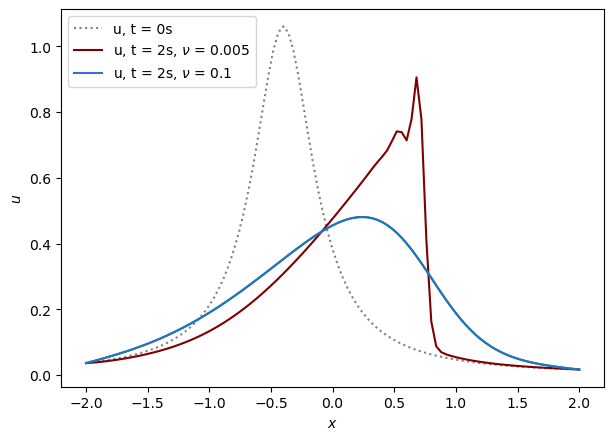

In [35]:
### BEGIN SOLUTION

fig, ax = pyp.subplots(figsize = (7,5), dpi = 100)


ax.plot(x, u0, label = f"u, t = {0}s", color = 'gray', linestyle = ":")
ax.plot(x, u, label = f"u, t = {tf}s, $\\nu$ = {NU}", color = 'maroon')
ax.plot(x, unu1, label = f"u, t = {tf}s, $\\nu$ = {NU1}", color = 'royalblue')
ax.plot(x, unu1, )
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")

ax.legend()

### END SOLUTION

### Step 9: Comment on the final solution (10 points)

In short please answer the following questions:

### Step 9.1:
What is the maximum value of u at $t_f = 2$?

In [29]:
### BEGIN SOLUTION


print(f"Max u = {np.max(u):.3f} at tf = {tf}")
### END SOLUTION

Max u = 0.906 at tf = 2


### Step 9.2:
What is the absolute relative difference between the maximum value of the initial (u0) and the final solution (u) at $t_f = 2$?

In [30]:
### BEGIN SOLUTION

maxu0 = np.max(u0)
maxu2 = np.max(u)

rel_diff = np.abs( (maxu2 - maxu0)/maxu0 )

print(f"Absolute Relative Difference between max at t = 0, and max at t = 2:\n{100*rel_diff:.1f}%")

### END SOLUTION

Absolute Relative Difference between max at t = 0, and max at t = 2:
14.6%


### Step 9.3:
What happens to the solution when $\nu = 0.1$ compared to the orginal solution (i.e. when $\nu = 0.005$) and to which term of the equation can we attribute the observed difference? (No need for a figure here)

With a higher nu value the laplacian has more weight and the u value diffuses more. This can be seen in the solution as the maximum values is lower and the peak more spread out. AtThe enhanced diffusion also stops the shockwave which is characterisitic of the non-linear burgers from forming at least at 2 seconds.

# Have a nice break and a Merry Christmas!